In [1]:
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import matplotlib as plt

C:\Users\Sreelaxmi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#Create a function to clean the tweets
def cleantweets(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Removed @mentions
    text = re.sub(r'#','',text) #Removing the # symbols
    text = re.sub(r'RT[\s]+','',text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','', text) # Removing the hyper link
    text = re.sub(r':','',text) #Removing the : symbols
    return text

# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    # joining the list of words with space separator
    return " ".join(text)  

def remove_punctuation(text):
    # Your Code Here
    import string
    # replacing the punctuation with no space, which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

def remove_emoticons(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sreelaxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df = pd.read_csv("Tweets.csv")

In [26]:
df['Tweet'] = df['Tweet'].apply(cleantweets).apply(remove_punctuation).apply(remove_stopwords).apply(remove_emoticons)

# Create two new columns
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

In [27]:
def getAnalysis(score):
    if score < 0:
        return 0
    elif score == 0:
        return 0
    else:
        return 1
        
        
df['Analysis'] = df['Polarity'].apply(getAnalysis) #1 for positive tweets and 0 for negative tweets

In [28]:
df.head()

,Unnamed: 0,User,Date Created,Tweet,state_id,state_name,city,coordinates,Subjectivity,Polarity,Analysis
0,0,maidenisis,2022-07-28 19:17:42+00:00,americas cando spirit helped expand rights amp...,NY,New York,New York,"40.6943, -73.9249, 10km",0.000000,0.000000,0
1,1,ResistanceRev,2022-07-26 12:32:10+00:00,nyc join us sunday 731 special evening art ac...,NY,New York,New York,"40.6943, -73.9249, 10km",0.375325,0.197835,1
2,2,DekonteCass,2022-07-25 22:08:17+00:00,yesterday one month final overturning roe v wa...,NY,New York,New York,"40.6943, -73.9249, 10km",1.000000,0.000000,0
3,3,biztocnews,2022-07-24 15:07:02+00:00,antiabortion leaders weigh enforcing bans civi...,NY,New York,New York,"40.6943, -73.9249, 10km",0.550000,-0.400000,0
4,4,SirSquinty,2022-07-22 04:51:17+00:00,phew time something bad roe v wade might happe...,NY,New York,New York,"40.6943, -73.9249, 10km",0.666667,-0.700000,0


In [29]:
df.to_csv("Polarity analysis.csv", sep=',')

In [30]:
ptweets = df[df.Analysis == 1]
ptweets = ptweets['Tweet']

round((ptweets.shape[0]/df.shape[0])*100,1)

38.4

In [31]:
ntweets = df[df.Analysis == 0]
ntweets = ntweets['Tweet']

round((ntweets.shape[0]/df.shape[0])*100,1)

61.6

In [98]:
df.head()

,Unnamed: 0,User,Date Created,Tweet,state_id,state_name,city,coordinates,Subjectivity,Polarity,Analysis
0,0,maidenisis,2022-07-28 19:17:42+00:00,americas cando spirit helped expand rights amp...,NY,New York,New York,"40.6943, -73.9249, 10km",0.000000,0.000000,0
1,1,ResistanceRev,2022-07-26 12:32:10+00:00,nyc join us sunday 731 special evening art ac...,NY,New York,New York,"40.6943, -73.9249, 10km",0.375325,0.197835,1
2,2,DekonteCass,2022-07-25 22:08:17+00:00,yesterday one month final overturning roe v wa...,NY,New York,New York,"40.6943, -73.9249, 10km",1.000000,0.000000,0
3,3,biztocnews,2022-07-24 15:07:02+00:00,antiabortion leaders weigh enforcing bans civi...,NY,New York,New York,"40.6943, -73.9249, 10km",0.550000,-0.400000,0
4,4,SirSquinty,2022-07-22 04:51:17+00:00,phew time something bad roe v wade might happe...,NY,New York,New York,"40.6943, -73.9249, 10km",0.666667,-0.700000,0


In [82]:
positive_tweet_state = df[df.Analysis == 1].groupby(['state_name'])['state_name'].count().reset_index(name='Positive tweet counts')


In [84]:
negative_tweet_state = df[df.Analysis == 0].groupby(['state_name'])['state_name'].count().reset_index(name='Negative tweet counts')


In [158]:
Tweet_count = pd.merge(positive_tweet_state, negative_tweet_state, on = 'state_name')

In [159]:
Tweet_count['Status'] = Tweet_count.apply(lambda x: "For" if x['Positive tweet counts'] >=
                     x['Negative tweet counts'] else "Against", axis=1)


In [160]:
Presidential_2020 = pd.read_csv('2020 Presidential.csv')

In [161]:
# Presidential_2020.head()

In [162]:
Tweet_count = pd.merge(Tweet_count, Presidential_2020, left_on = 'state_name', right_on = 'State', how = 'right')

In [163]:
Tweet_count.to_csv("Tweet_count.csv", sep=',')

In [164]:
Tweet_count['Total Tweets'] = Tweet_count['Positive tweet counts'] + Tweet_count['Negative tweet counts']

In [165]:

# import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (10, 5))
 
# # plt.bar(Tweet_count['state_name'], Tweet_count['Positive tweet counts'], Tweet_count['Negative tweet counts'], color ='maroon',
# #         width = 0.4)

# plt.bar(Tweet_count_2['state_name'], Tweet_count_2['Positive tweet counts'], color ='r', label ='+ve Tweets')
# plt.bar(Tweet_count_2['state_name'], Tweet_count_2['Negative tweet counts'], color ='g', label ='-ve Tweets')

# plt.show()

In [171]:
Tweet_count

,state_name,Positive tweet counts,Negative tweet counts,Status,State,Party,State ID,Total Tweets
42,New York,188.0,253.0,Against,New York,D,NY,441.0
13,Texas,59.0,121.0,Against,Texas,R,TX,180.0
52,Virginia,54.0,105.0,Against,Virginia,D,VA,159.0
22,District of Columbia,47.0,82.0,Against,District of Columbia,D,DC,129.0
18,California,36.0,57.0,Against,California,D,CA,93.0
40,New Jersey,38.0,42.0,Against,New Jersey,D,NJ,80.0
8,Nevada,34.0,41.0,Against,Nevada,D,NV,75.0
0,Arizona,29.0,39.0,Against,Arizona,D,AZ,68.0
25,Illinois,30.0,36.0,Against,Illinois,D,IL,66.0
1,Florida,29.0,34.0,Against,Florida,R,FL,63.0


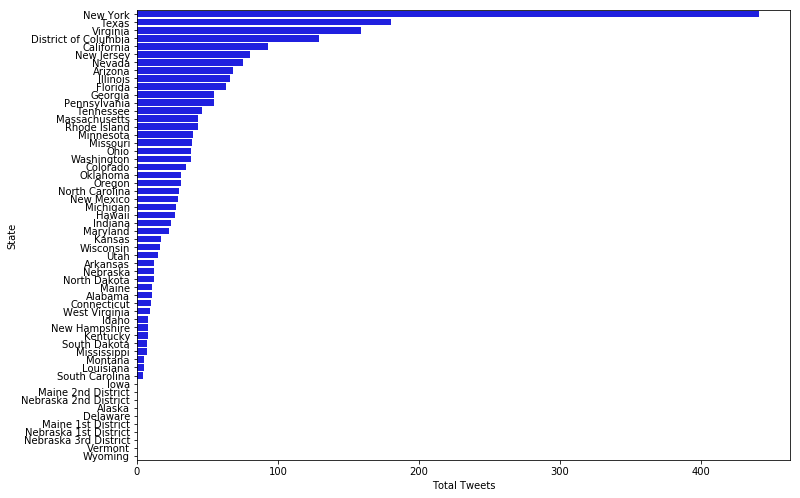

In [167]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
 
sns.barplot(y = 'State',
            x = 'Total Tweets',
            color = 'blue',
            data = Tweet_count,
           order = Tweet_count.sort_values('Total Tweets', ascending = False).State)
 
# Show the plot
plt.show()

In [168]:
Tweet_count.sort_values('Total Tweets',ascending=False,inplace=True)

In [170]:
top_10 = Tweet_count.head(10)

In [95]:
import geopandas

In [173]:
import plotly.express as px
fig = px.choropleth(Tweet_count.dropna(),
                    locations='State ID', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Party',
                    color_continuous_scale="Viridis_r",
                    facet_col = 'Status'
                    
                    )
fig.show()

In [151]:
import plotly.express as px
fig = px.choropleth(Tweet_count.dropna(),
                    locations='State ID', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Status',
                    color_discrete_map={'Against':'purple',
                                        'For':'orange'}
#                     color_continuous_scale="Viridis_r",
#                     facet_col = 'Status'
                    
                    )
fig.show()

In [108]:
positive_tweet_city = df[df.Analysis == 1].groupby(['state_name', 'city'])['state_name'].count().reset_index(name='Positive tweet counts')
negative_tweet_city = df[df.Analysis == 0].groupby(['state_name', 'city'])['state_name'].count().reset_index(name='Negative tweet counts')
City_Tweet_count = pd.merge(positive_tweet_city, negative_tweet_city, on = ['state_name', 'city'])
City_Tweet_count['Status'] = City_Tweet_count.apply(lambda x: "For" if x['Positive tweet counts'] >=
                     x['Negative tweet counts'] else "Against", axis=1)


In [109]:
City_Tweet_count

,state_name,city,Positive tweet counts,Negative tweet counts,Status
0,Alabama,Birmingham,1,1,For
1,Alabama,Huntsville,1,3,Against
2,Alabama,Mobile,1,2,Against
3,Arizona,Mesa,5,4,For
4,Arizona,Phoenix,14,23,Against
...,...,...,...,...,...
112,Virginia,Richmond,1,11,Against
113,Virginia,Virginia Beach,1,4,Against
114,Washington,Seattle,12,21,Against
115,West Virginia,Charleston,1,4,Against


In [ ]:
palette_color = sns.color_palette("Paired")
  
# plotting data on chart
plt.pie(positive_tweetsdf['count'], labels = positive_tweetsdf['UserType'] ,colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Positive Tweets')
plt.savefig('Distibution of positive tweets.png')
# displaying chart
plt.show()


In [174]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

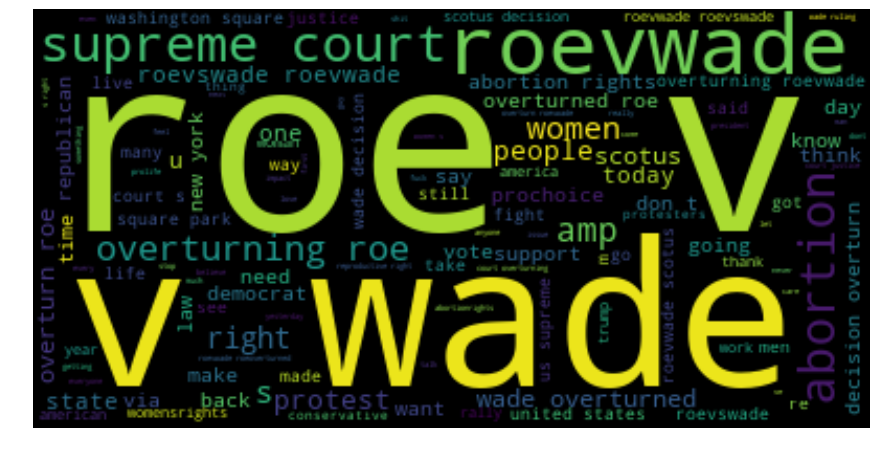

In [176]:
text = " ".join(i for i in df.Tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()